In [1]:
#Import the necessary libraries (numpy and pandas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#read the scraped file
df = pd.read_csv('tweetfinalenergyscotland.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Columns: 217 entries, Unnamed: 0 to quotedTweet.cashtags
dtypes: bool(2), float64(72), int64(14), object(129)
memory usage: 1.4+ MB


In [4]:
# drop the columns that are not required
df = df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                  'quotedTweet.source','quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [5]:
# drop additional columns that appear towards the right of the last relevant column
df.drop(df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         864 non-null    int64  
 1   date                               864 non-null    object 
 2   content                            864 non-null    object 
 3   replyCount                         864 non-null    int64  
 4   retweetCount                       864 non-null    int64  
 5   likeCount                          864 non-null    int64  
 6   lang                               864 non-null    object 
 7   sourceLabel                        864 non-null    object 
 8   hashtags                           164 non-null    object 
 9   username                           864 non-null    object 
 10  user_dispaly_name                  864 non-null    object 
 11  user_description                   766 non-null    object 

In [7]:
# drop additional columns that appear towards the right of the last relevant column
df.drop(df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31]], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             864 non-null    int64 
 1   date                   864 non-null    object
 2   content                864 non-null    object
 3   replyCount             864 non-null    int64 
 4   retweetCount           864 non-null    int64 
 5   likeCount              864 non-null    int64 
 6   lang                   864 non-null    object
 7   sourceLabel            864 non-null    object
 8   hashtags               164 non-null    object
 9   username               864 non-null    object
 10  user_dispaly_name      864 non-null    object
 11  user_description       766 non-null    object
 12  user_raw_description   766 non-null    object
 13  user_verified          864 non-null    bool  
 14  user_created           864 non-null    object
 15  user_followers_count   

In [9]:
# drop the rows
#df.drop(df.index[5500:4907],0,inplace=True)

In [10]:
#df.info()

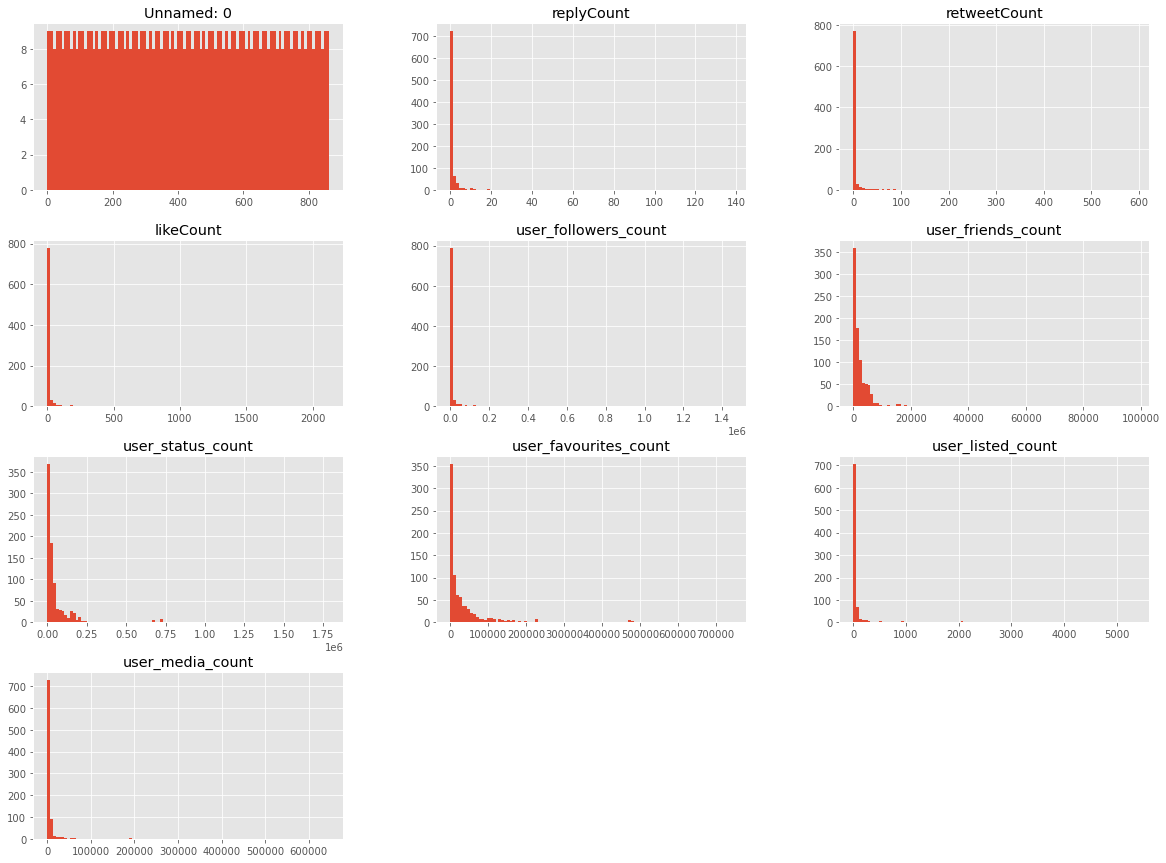

In [11]:
#visualising for better undertanding of the spread of the variables
df.hist(bins=100, figsize=(20,15))
plt.show()

In [12]:
# IMPORT modules for natural language processing

In [13]:
import re
import string
import nltk

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [15]:
#creating a stopwords set
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

<AxesSubplot:>

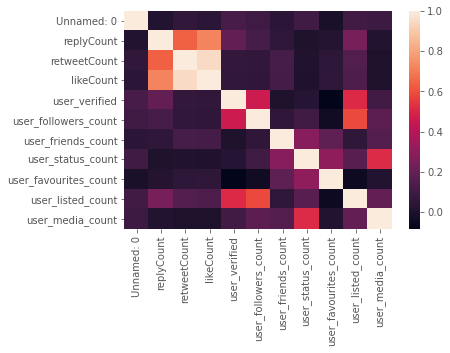

In [17]:
import seaborn as sns
sns.heatmap(df.corr())

Percentage False    0.957176
True     0.042824
Name: user_verified, dtype: float64


<AxesSubplot:ylabel='user_verified'>

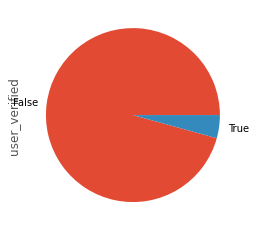

In [18]:
print('Percentage',df.user_verified.value_counts(normalize=True))
df.user_verified.value_counts(normalize=True).plot(kind='pie')

In [19]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

In [20]:
# make a new dataframe with only content
content_df = df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_df.head()

,content
0,Our CEO @DrDMacaskill expresses his concerns a...
1,Nicola Sturgeon: Scotland would still be facin...
2,@lornaslater The greens have caused the energy...
3,Nicola Sturgeon: Scotland would still be facin...
4,Anum Qaisar just another New SNP MP using soun...


In [21]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  864 non-null    object
dtypes: object(1)
memory usage: 6.9+ KB


In [22]:
content_df = content_df.rename(columns={'content':'tokenized_content'})

In [23]:
content_df.head()

,tokenized_content
0,Our CEO @DrDMacaskill expresses his concerns a...
1,Nicola Sturgeon: Scotland would still be facin...
2,@lornaslater The greens have caused the energy...
3,Nicola Sturgeon: Scotland would still be facin...
4,Anum Qaisar just another New SNP MP using soun...


In [24]:
def preprocess_content_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [25]:
content_df.tokenized_content = content_df['tokenized_content'].apply(preprocess_content_text)

In [26]:
content_df.tokenized_content.head()
                

0    ceo drdmacaskill expresses concerns energy cri...
1    nicola sturgeon scotland would still facing en...
2    lornaslater greens caused energy crisis scotla...
3    nicola sturgeon scotland would still facing en...
4    anum qaisar another new snp mp using soundbite...
Name: tokenized_content, dtype: object

In [27]:
#content_df = content_df.drop_duplicates('content')

In [28]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [29]:
content_df['tokenized_content'] = content_df['tokenized_content'].apply(lambda x: stemming(x))

In [30]:
# check the data after pre-processing
content_df['tokenized_content'][0]

'ceo drdmacaskill expresses concerns energy crisis care homes good morning scotland today heard reports energy prices increasing 6fold care homes urgently need support amp intervention listen 24231 ➡️'

In [31]:
# import VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [33]:
def sentiment_vader(content):
    over_all_polarity = sia.polarity_scores(content)
    if over_all_polarity['compound'] >= 0.05:
        return "positive"
    elif over_all_polarity['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

In [34]:
content_df['sentiment_vader'] = content_df['tokenized_content'].apply(lambda x: sentiment_vader(x))

In [35]:
#diplay the dataframe with the new column for sentiment
content_df

,tokenized_content,sentiment_vader
0,ceo drdmacaskill expresses concerns energy cri...,positive
1,nicola sturgeon scotland would still facing en...,positive
2,lornaslater greens caused energy crisis scotla...,negative
3,nicola sturgeon scotland would still facing en...,negative
4,anum qaisar another new snp mp using soundbite...,negative
...,...,...
859,face energy crisis warnings ignored writes pau...,negative
860,billgates scotland gets ready floating farm en...,positive
861,secretnews interesting gottfried von werdenber...,negative
862,scotland ’ answer energy crisis making us look...,negative


In [36]:
print('Percentage',content_df['sentiment_vader'].value_counts(normalize=True))
#content_df.sentiment_vader._counts(normalize=True).plot(kind='pie')

Percentage negative    0.706019
positive    0.268519
neutral     0.025463
Name: sentiment_vader, dtype: float64


In [37]:
#extracting the positive for state
def positive_mention_state(content):
    terms = re.findall("Westminster|UK|WM|England|union|reserved|tories", content)
    
    return terms

In [38]:
content_df['centre_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [39]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned
0,ceo drdmacaskill expresses concerns energy cri...,positive,[]
1,nicola sturgeon scotland would still facing en...,positive,[tories]
2,lornaslater greens caused energy crisis scotla...,negative,[]
3,nicola sturgeon scotland would still facing en...,negative,[]
4,anum qaisar another new snp mp using soundbite...,negative,[]
...,...,...,...
859,face energy crisis warnings ignored writes pau...,negative,[]
860,billgates scotland gets ready floating farm en...,positive,[]
861,secretnews interesting gottfried von werdenber...,negative,[]
862,scotland ’ answer energy crisis making us look...,negative,[]


In [40]:
#extracting the positive for state
def positive_mention_state(content):
    terms = re.findall("SNP|holyrood|Sturgeon|windmills|renewable", content)
    
    return terms

In [41]:
content_df['subnational_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [42]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned,subnational_terms_mentioned
0,ceo drdmacaskill expresses concerns energy cri...,positive,[],[]
1,nicola sturgeon scotland would still facing en...,positive,[tories],[]
2,lornaslater greens caused energy crisis scotla...,negative,[],[]
3,nicola sturgeon scotland would still facing en...,negative,[],[]
4,anum qaisar another new snp mp using soundbite...,negative,[],[]
...,...,...,...,...
859,face energy crisis warnings ignored writes pau...,negative,[],[]
860,billgates scotland gets ready floating farm en...,positive,[],[]
861,secretnews interesting gottfried von werdenber...,negative,[],[]
862,scotland ’ answer energy crisis making us look...,negative,[],[]


In [43]:
#extracting the correct and incorrect attribution for state

def perception(content):
    if(content['sentiment_vader'] == 'positive' and len(content['centre_terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'negative' and len(content['centre_terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'positive' and len(content['subnational_terms_mentioned'])!=0):
        return 'incorrect'
    elif(content['sentiment_vader'] == 'negative' and len(content['subnational_terms_mentioned'])!=0):
        return 'incorrect'
    
    return 'non-opinionated'

In [44]:
content_df['perception'] = content_df.apply(perception, axis=1)

In [45]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned,subnational_terms_mentioned,perception
0,ceo drdmacaskill expresses concerns energy cri...,positive,[],[],non-opinionated
1,nicola sturgeon scotland would still facing en...,positive,[tories],[],correct
2,lornaslater greens caused energy crisis scotla...,negative,[],[],non-opinionated
3,nicola sturgeon scotland would still facing en...,negative,[],[],non-opinionated
4,anum qaisar another new snp mp using soundbite...,negative,[],[],non-opinionated
...,...,...,...,...,...
859,face energy crisis warnings ignored writes pau...,negative,[],[],non-opinionated
860,billgates scotland gets ready floating farm en...,positive,[],[],non-opinionated
861,secretnews interesting gottfried von werdenber...,negative,[],[],non-opinionated
862,scotland ’ answer energy crisis making us look...,negative,[],[],non-opinionated


In [46]:
df.head()

,Unnamed: 0,date,content,replyCount,retweetCount,likeCount,lang,sourceLabel,hashtags,username,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,0,2022-08-23 09:33:24+00:00,Our CEO @DrDMacaskill expresses his concerns a...,0,1,4,en,Hootsuite Inc.,NaN,scottishcare,...,The voice of the independent care sector in Sc...,False,2012-02-14T21:09:36+00:00,13649,13245,23364,11590,83,2737,Scotland
1,1,2022-08-23 08:37:43+00:00,Nicola Sturgeon: Scotland would still be facin...,0,0,1,en,Twitter Web App,NaN,OrkneyBear,...,Independence for Scotland. My views are my own...,False,2012-01-12T20:27:36+00:00,2742,3846,109730,37132,27,214,Orkney
2,2,2022-08-23 07:25:42+00:00,@lornaslater The greens have caused the energy...,0,0,0,en,Twitter for Android,NaN,DaveNotoSNP,...,NaN,False,2020-07-12T11:03:11+00:00,60,33,1525,12105,3,11,NaN
3,3,2022-08-23 04:07:24+00:00,Nicola Sturgeon: Scotland would still be facin...,0,0,0,en,Twitter for iPhone,NaN,Camz99,...,"Environmentalist, traveler and optimist. Toget...",False,2010-10-19T19:28:44+00:00,6370,6247,730602,1107,255,10971,"Edinburgh, Scotland"
4,4,2022-08-22 21:18:54+00:00,Anum Qaisar just another New SNP MP using soun...,0,3,4,en,Twitter Web App,NaN,ga11acher,...,follow me for yes Scotland,False,2012-06-24T18:56:46+00:00,4342,2448,103805,47876,15,717,NaN


In [47]:
content_perception_df = pd.concat([content_df, df], axis=1)

In [48]:
content_perception_df.head()

,tokenized_content,sentiment_vader,centre_terms_mentioned,subnational_terms_mentioned,perception,Unnamed: 0,date,content,replyCount,retweetCount,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,ceo drdmacaskill expresses concerns energy cri...,positive,[],[],non-opinionated,0,2022-08-23 09:33:24+00:00,Our CEO @DrDMacaskill expresses his concerns a...,0,1,...,The voice of the independent care sector in Sc...,False,2012-02-14T21:09:36+00:00,13649,13245,23364,11590,83,2737,Scotland
1,nicola sturgeon scotland would still facing en...,positive,[tories],[],correct,1,2022-08-23 08:37:43+00:00,Nicola Sturgeon: Scotland would still be facin...,0,0,...,Independence for Scotland. My views are my own...,False,2012-01-12T20:27:36+00:00,2742,3846,109730,37132,27,214,Orkney
2,lornaslater greens caused energy crisis scotla...,negative,[],[],non-opinionated,2,2022-08-23 07:25:42+00:00,@lornaslater The greens have caused the energy...,0,0,...,NaN,False,2020-07-12T11:03:11+00:00,60,33,1525,12105,3,11,NaN
3,nicola sturgeon scotland would still facing en...,negative,[],[],non-opinionated,3,2022-08-23 04:07:24+00:00,Nicola Sturgeon: Scotland would still be facin...,0,0,...,"Environmentalist, traveler and optimist. Toget...",False,2010-10-19T19:28:44+00:00,6370,6247,730602,1107,255,10971,"Edinburgh, Scotland"
4,anum qaisar another new snp mp using soundbite...,negative,[],[],non-opinionated,4,2022-08-22 21:18:54+00:00,Anum Qaisar just another New SNP MP using soun...,0,3,...,follow me for yes Scotland,False,2012-06-24T18:56:46+00:00,4342,2448,103805,47876,15,717,NaN


Percentage non-opinionated    0.803241
correct            0.113426
incorrect          0.083333
Name: perception, dtype: float64


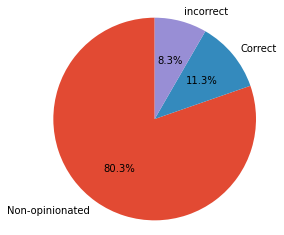

In [49]:
print('Percentage',content_perception_df.perception.value_counts(normalize=True))
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(content_perception_df['perception'].value_counts().tolist(), 
        labels=['Non-opinionated', 'Correct', 'incorrect'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

In [50]:
#def perception(voter):
    #if voter == "1":
        #return "correct"
    #elif voter == "":
        #return "non-partisan"
    #elif voter == "0":
        #return "incorrect"

In [51]:
#content_perception_df['voter'] = content_perception_df['voter_perception'].apply(perception)

In [52]:
#content_perception_df

In [53]:
#fig = plt.figure(figsize=(5,5))
#sns.countplot(x='voter', data = content_perception_df)

#### fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = content_perception_df['voter'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops = wp,
         explode = explode, label="")
plt.title("attribution of responsibility by voters")

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [55]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_perception_df['tokenized_content'])

In [56]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 17124

First 20 features:
 ['01', '01 took', '07985bill', '07985bill bogotabob', '07985bill chinnyreckon21', '07985bill dointhebiz1', '07985bill glenerne', '07985bill kapshow', '07985bill marydonald4', '10', '10 europe', '10 flat', '10 million', '10 oil', '10 warned', '100', '100 barrel', '100 equivalent', '100 jobs', '100 million']


In [57]:
x = content_perception_df['tokenized_content']
y = content_perception_df['perception']
x = vect.transform(x)

In [58]:
x.shape

(864, 17124)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [60]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (691, 17124)
Size of y_train: (691,)
Size of x_test: (173, 17124)
Size of y_test: (173,)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [62]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 89.60%


In [63]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  3   0  11]
 [  0   5   7]
 [  0   0 147]]


                 precision    recall  f1-score   support

        correct       1.00      0.21      0.35        14
      incorrect       1.00      0.42      0.59        12
non-opinionated       0.89      1.00      0.94       147

       accuracy                           0.90       173
      macro avg       0.96      0.54      0.63       173
   weighted avg       0.91      0.90      0.87       173



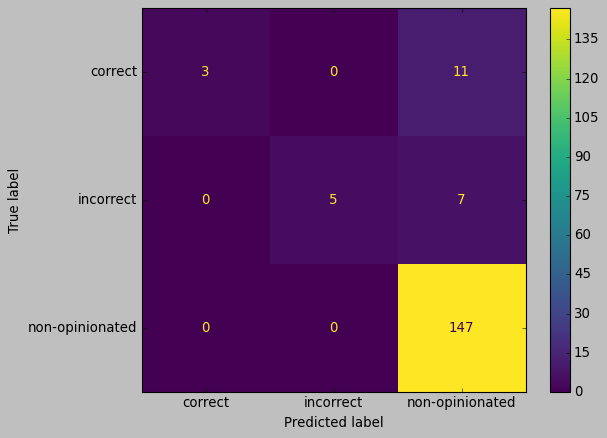

In [64]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [67]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [68]:
y_pred= grid.predict(x_test)

In [69]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.75%


In [70]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  3   0  11]
 [  0   5   7]
 [  0   0 147]]


                 precision    recall  f1-score   support

        correct       1.00      0.21      0.35        14
      incorrect       1.00      0.42      0.59        12
non-opinionated       0.89      1.00      0.94       147

       accuracy                           0.90       173
      macro avg       0.96      0.54      0.63       173
   weighted avg       0.91      0.90      0.87       173



In [71]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [72]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:2f}%".format(svc_acc*100))

test accuracy: 90.751445%


In [73]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  5   0   9]
 [  0   5   7]
 [  0   0 147]]


                 precision    recall  f1-score   support

        correct       1.00      0.36      0.53        14
      incorrect       1.00      0.42      0.59        12
non-opinionated       0.90      1.00      0.95       147

       accuracy                           0.91       173
      macro avg       0.97      0.59      0.69       173
   weighted avg       0.92      0.91      0.89       173



In [74]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree': [1,3,5,7],
    'gamma': [0.01, 1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [75]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [76]:
y_pred = grid.predict(x_test)

In [77]:
logreg_acc= accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 90.75%


In [78]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  5   0   9]
 [  0   5   7]
 [  0   0 147]]


                 precision    recall  f1-score   support

        correct       1.00      0.36      0.53        14
      incorrect       1.00      0.42      0.59        12
non-opinionated       0.90      1.00      0.95       147

       accuracy                           0.91       173
      macro avg       0.97      0.59      0.69       173
   weighted avg       0.92      0.91      0.89       173



In [79]:
test_df = pd.read_csv('tweetfinalhealthkerala.csv')

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (28,54,162,163,164,165,166,168,169,171,172,173,174,175,176,183,184,185,186,187,188,190,196,197,198,199,200,201,202,207,210,212,213,214,215) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 217 entries, Unnamed: 0 to user.label.longDescription
dtypes: bool(2), float64(64), int64(14), object(137)
memory usage: 32.8+ MB


In [81]:
# drop the columns that are not required
test_df = test_df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', 'label._type', 'label.description', 'label.url',
                 'label.badgeUrl', 'label.longDescription', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                 'user.label._type', 'user.label.description', 'user.label.url',
                 'user.label.badgeUrl','user.label.longDescription', 'quotedTweet.source',
                 'quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [82]:
# drop additional columns that appear towards the right of the last relevant column
test_df.drop(test_df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             20000 non-null  int64 
 1   date                   20000 non-null  object
 2   content                20000 non-null  object
 3   replyCount             20000 non-null  int64 
 4   retweetCount           20000 non-null  int64 
 5   likeCount              20000 non-null  int64 
 6   lang                   20000 non-null  object
 7   sourceLabel            20000 non-null  object
 8   hashtags               7826 non-null   object
 9   username               20000 non-null  object
 10  user_dispaly_name      19999 non-null  object
 11  user_description       17983 non-null  object
 12  user_raw_description   17983 non-null  object
 13  user_verified          20000 non-null  bool  
 14  user_created           20000 non-null  object
 15  user_followers_coun

In [84]:
# drop the rows
test_df.drop(test_df.index[:19800],0,inplace=True)

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 19800 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             200 non-null    int64 
 1   date                   200 non-null    object
 2   content                200 non-null    object
 3   replyCount             200 non-null    int64 
 4   retweetCount           200 non-null    int64 
 5   likeCount              200 non-null    int64 
 6   lang                   200 non-null    object
 7   sourceLabel            200 non-null    object
 8   hashtags               58 non-null     object
 9   username               200 non-null    object
 10  user_dispaly_name      200 non-null    object
 11  user_description       164 non-null    object
 12  user_raw_description   164 non-null    object
 13  user_verified          200 non-null    bool  
 14  user_created           200 non-null    object
 15  user_followers_co

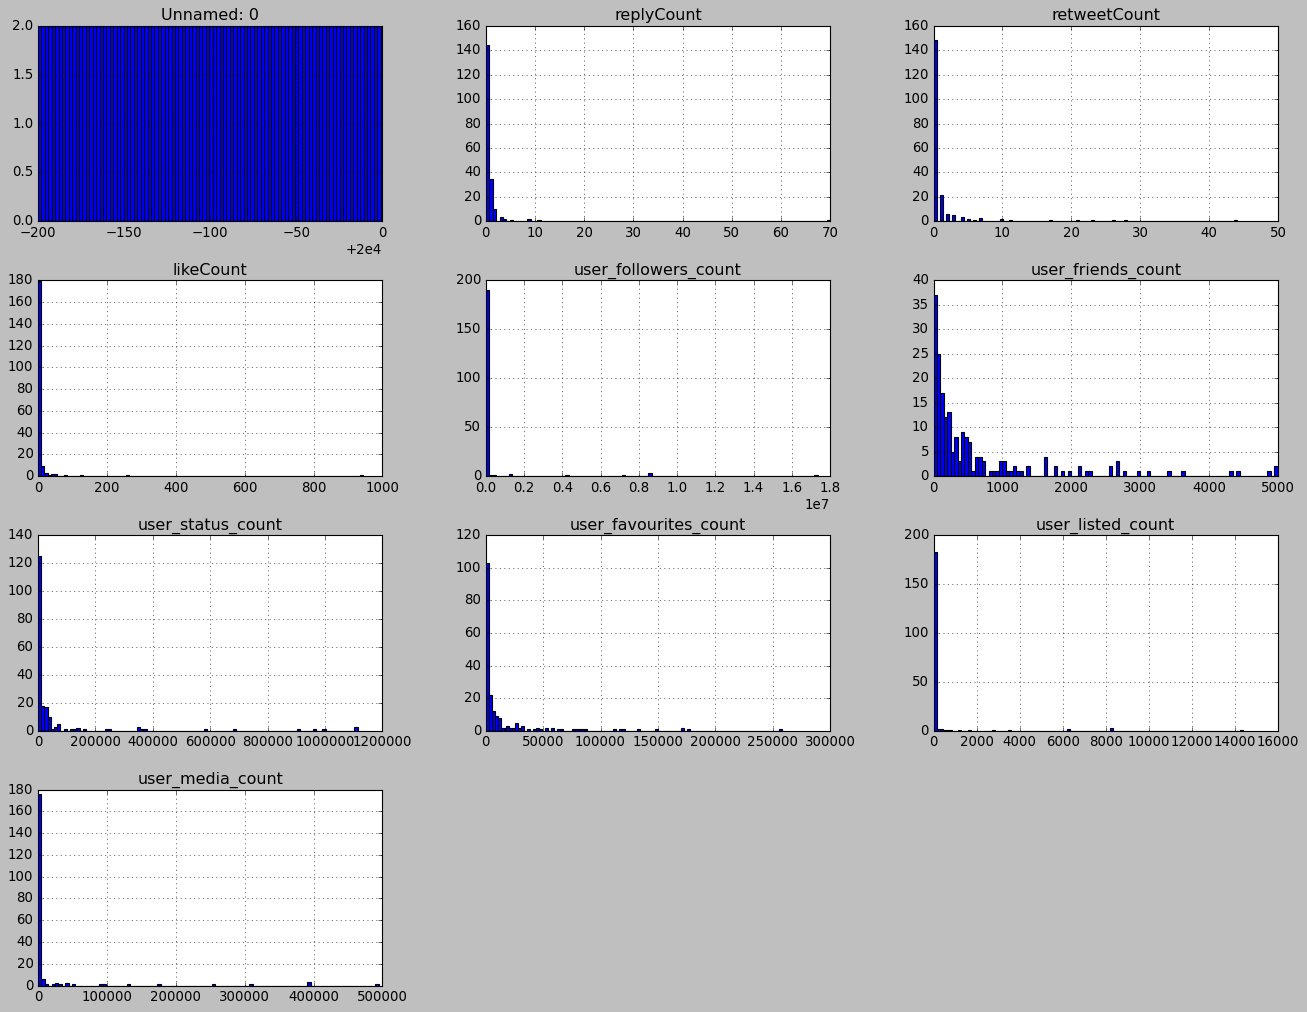

In [86]:
#visualising for better undertanding of the spread of the variables
test_df.hist(bins=100, figsize=(20,15))
plt.show()

In [87]:
test_df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

In [88]:
content_test_df = test_df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_test_df.head()

,content
19800,I'm a kerala state syllabus +2 student. Every...
19801,"With a total population of 35 million, Kerala ..."
19802,Kerala govt partially relents after a long fig...
19803,@AdvMamtaSharma Justice for kerala students pl...
19804,The Central Gas Manifold System for Oxygen sup...


In [89]:
def preprocess_content_test_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [90]:
content_test_df.content = content_test_df['content'].apply(preprocess_content_test_text)

In [91]:
content_test_df.content.head()

19800    im kerala state syllabus 2 student everyone ba...
19801    total population 35 million kerala currently n...
19802    kerala govt partially relents long fight us he...
19803    advmamtasharma justice kerala students please ...
19804    central gas manifold system oxygen supply esta...
Name: content, dtype: object

In [92]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [93]:
content_test_df['content'] = content_test_df['content'].apply(lambda x: stemming(x))

In [94]:
content_test_df

,content
19800,im kerala state syllabus 2 student everyone ba...
19801,total population 35 million kerala currently n...
19802,kerala govt partially relents long fight us he...
19803,advmamtasharma justice kerala students please ...
19804,central gas manifold system oxygen supply esta...
...,...
19995,short hindu temple anywhere india muslim chris...
19996,kerala health worker ’ fb post siva temple lak...
19997,1798 asha workers infected covid kerala far tw...
19998,kerala health services department ’ dr aarathy...


In [95]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_test_df['content'])

In [96]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 5431

First 20 features:
 ['0471', '0471 2551056', '10', '10 govt', '10 march', '100', '100 perfection', '100 years', '1000s', '1000s health', '10750', '10750 vials', '11', '11 332', '11cms', '11cms nonbjp', '12thboardexams2021', '12thboardexams2021 cancelled', '14', '14 2021']


In [97]:
x = content_test_df['content']
x = vect.transform(x)

In [98]:
x.shape

(200, 5431)

In [99]:
content_test_df.shape

(200, 1)

In [100]:
prediction = SVCmodel.predict(x)

ValueError: X has 5431 features per sample; expecting 17124